### Target Variable

Define the target variable.

In [27]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

save_figures = False
figure_path = "../figures/target/"
df_plastic = pd.read_spss("../data/ESM00385X1 Observational Study.sav")

In [2]:
df_init = pd.DataFrame(np.ones(df_plastic.shape[0], dtype = int), columns = ["y"])
df_init.shape

(3764, 1)

The *BagUserGroup* varible is close enough to the ideal target variable for this project, but some customizations have be made for this project. The [attached manual](<../data/ESM00385X1 Observational Study Variable List.docx>) explains how the original researchers classified the customers into the five categories based on their bag usage.

> - “1” = Only SUPB used (SUPBBinary=1 & OWNBAGBinary=0)
> - “2” = SUPB & Own bags used (SUPBBinary=1 & OWNBAGBinary=1)
> - “3” = Only Own bags used (SUPBBinary=0 & OWNBAGBinary=1)
> - “4” = Only non-conventioanl bags used (SUPBBinary=0 & OWNBAGBinary=0 & OtherBag = 1)
> - “5” = No bags used (SUPBBinary=0 & OWNBAGBinary=0 & OtherBag = 0)


If the only kind of bag that a customer has used was the single-use plastic bag that was newly purchased from the supermarket, that new purchase of plastic bag is labeled ungreen. If the customer has reused a single-use plastic bag that they had already had, this customer's behavior is still green, because no additional purchase of the plastic bag was made. 

In [3]:
condition_new_purchase = ((df_plastic["BagUseGroup"] == "Only SUPB used") 
                            & (df_plastic["SUPB_Own"] > 0))

df_init.loc[condition_new_purchase, "y"] = 0

I think it is understandable to purchase one additional plastic bag if the customer was already carrying other reusuable bags. Maybe the customer mistakenly thought the reusable bag was big enough, but it turned out that they had to buy a plastic bag. In this case, I think we should give the customer the benefit of doubt. However, if a customer purchased more than one plastic bags, the customer was probably not planning on fitting all grocery items into their reusable bag. 

In [4]:
condition_multiple_purchase = ((df_plastic["BagUseGroup"] == "SUPB & Own bags used") 
                               & (df_plastic["SUPB_Own"]  > 1 ))

df_init.loc[condition_multiple_purchase, "y"] = 0

There is no way of telling if the customers in this observational data were carrying their other bags that are typically not used as shopping bags such as their backpack or handbag for the purpose of using them as 

In [5]:
df_init["y"].value_counts()

1    3015
0     749
Name: y, dtype: int64

### Initial selection of feature variables

First select the 11 variables on the customer and the supermarket branch as the inital set of feature variables. More interaction terms and other terms are going to be added later with feature engineering.

In [6]:
initial_feature_cols = ["Year", "Country", "Supermarket", "Time", 
                        "Weather", "ObsSize", "FemaleN", "MaleN", 
                        "Gender", "Age", "Child"]

In [7]:
df_init[initial_feature_cols] = df_plastic[initial_feature_cols].copy()

In [8]:
df_init

,y,Year,Country,Supermarket,Time,Weather,ObsSize,FemaleN,MaleN,Gender,Age,Child
0,1,2016,Wales,Tesco Metro,Morning (10.30-11.30),Sunny,1.0,0.0,1.0,Male,36 to 55,None
1,1,2016,Wales,Tesco Metro,Morning (10.30-11.30),Sunny,1.0,0.0,1.0,Male,36 to 55,None
2,1,2016,Wales,Tesco Metro,Morning (10.30-11.30),Sunny,1.0,1.0,0.0,Female,18-35,None
3,1,2016,Wales,Tesco Metro,Morning (10.30-11.30),Sunny,2.0,2.0,0.0,Group: Gender not applicable,Group: Age not applicable,None
4,1,2016,Wales,Tesco Metro,Morning (10.30-11.30),Sunny,1.0,1.0,0.0,Female,56+,None
...,...,...,...,...,...,...,...,...,...,...,...,...
3759,1,2015,England,Tesco Extra,Saturday Morning (11-12),Sunny,1.0,1.0,0.0,Female,56+,None
3760,1,2015,England,Tesco Extra,Saturday Morning (11-12),Sunny,1.0,1.0,0.0,Female,18-35,None
3761,1,2015,England,Tesco Extra,Saturday Morning (11-12),Sunny,1.0,1.0,0.0,Female,56+,None
3762,0,2015,England,Tesco Extra,Saturday Morning (11-12),Sunny,1.0,1.0,0.0,Female,56+,None


In [9]:
df_init.to_parquet("../data/init.parquet")

In [10]:
df_init.dtypes

y                 int32
Year           category
Country        category
Supermarket    category
Time           category
Weather        category
ObsSize         float64
FemaleN         float64
MaleN           float64
Gender         category
Age            category
Child          category
dtype: object

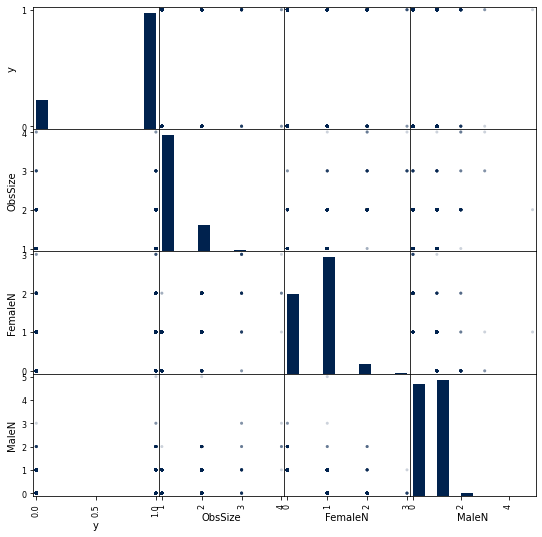

In [11]:
cmap_cividis = plt.get_cmap("cividis")
colors_cividis5 = cmap_cividis([0, 0.25, 0.5, 0.75, 1])

fig_sca_matrix, ax_sca_matrix = plt.subplots(4, 4)

pd.plotting.scatter_matrix(df_init.select_dtypes([int, float]), 
                           ax = ax_sca_matrix, 
                           alpha = 0.2, 
                           color = colors_cividis5[0],
                           hist_kwds = {"color":colors_cividis5[0]})

fig_sca_matrix.set_size_inches([9, 9])

# save_figures
if save_figures:
    fig_name = f"{figure_path}Init Scatter Matrix"
    fig_sca_matrix.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_inches="tight")
    fig_sca_matrix.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_inches="tight")
    fig_sca_matrix.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_inches="tight")

In [12]:
random_gen = np.random.default_rng(123)

def jitter_data2(x, rng):
    mu = x
    sigma = 0.1
    return rng.normal(mu, sigma)

In [13]:
df_init_jittered = df_init.select_dtypes([int, float]).copy()
for each_col in df_init_jittered.columns:
    df_init_jittered[each_col] = jitter_data2(df_init_jittered[each_col], random_gen)

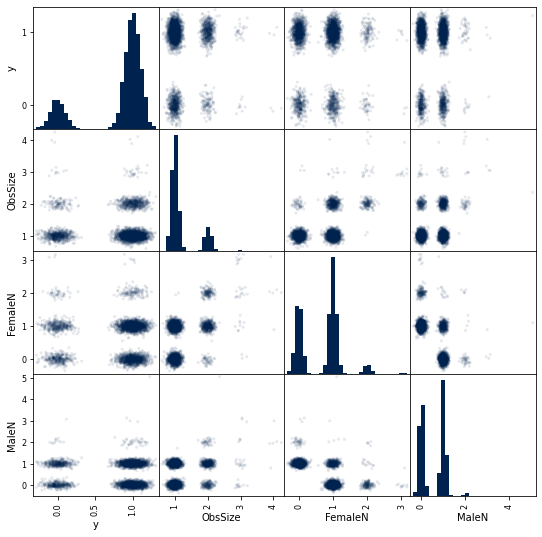

In [14]:
fig_sca_matrix2, ax_sca_matrix2 = plt.subplots(4, 4)

pd.plotting.scatter_matrix(df_init_jittered, 
                           ax = ax_sca_matrix2, 
                           alpha = 0.1, 
                           color = colors_cividis5[0],
                           hist_kwds = {"color":colors_cividis5[0], "bins":30})

fig_sca_matrix2.set_size_inches([9, 9])

# save_figures
if save_figures:
    fig_name = f"{figure_path}Init Scatter Matrix Jittered"
    fig_sca_matrix2.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_inches="tight")
    fig_sca_matrix2.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_inches="tight")
    fig_sca_matrix2.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_inches="tight")

### Target and feature plots 

In [15]:
df_tar_bar1 = df_init[["y", "Year", "Country", "Weather"]].copy()
df_tar_bar1.replace({"y": {0:"No", 1:"Yes"}}, inplace = True)

df_tar_bar1 = df_tar_bar1[["y", "Year", "Country", "Weather"]].groupby(["Country", "Year", "y"]).agg("count").unstack()
df_tar_bar1.columns = df_tar_bar1.columns.droplevel()
df_tar_bar1.columns.name = None
df_tar_bar1 = df_tar_bar1.reset_index()

df_tar_bar1

,Country,Year,No,Yes
0,England,2015,374,445
1,England,2016,147,837
2,Wales,2015,81,737
3,Wales,2016,147,996


In [16]:
df_tar_bar1["Sum"] = df_tar_bar1["Yes"] + df_tar_bar1["No"]
df_tar_bar1["Yes"] = df_tar_bar1["Yes"]/df_tar_bar1["Sum"]
df_tar_bar1["No"] = df_tar_bar1["No"]/df_tar_bar1["Sum"]
df_tar_bar1

,Country,Year,No,Yes,Sum
0,England,2015,0.456654,0.543346,819
1,England,2016,0.149390,0.850610,984
2,Wales,2015,0.099022,0.900978,818
3,Wales,2016,0.128609,0.871391,1143


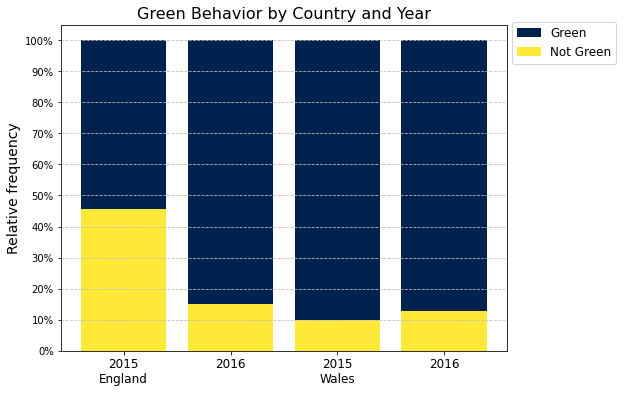

In [17]:
tar_bar1_ticks = [f"{c}, {y}" for c, y in zip(df_tar_bar1["Country"], df_tar_bar1["Year"])]
tar_bar1_xlabels = ["2015\nEngland", "2016", 
                    "2015\nWales", "2016"]


fig_tar_bar1, ax_tar_bar1 = plt.subplots()

ax_tar_bar1.bar(x = tar_bar1_ticks, 
                height = df_tar_bar1["Yes"], 
                bottom = df_tar_bar1["No"],
                width = 0.8, 
                zorder = -100, 
                label = "Green", 
                color = colors_cividis5[0])

ax_tar_bar1.bar(x = tar_bar1_ticks, 
                height = df_tar_bar1["No"], 
                width = 0.8, 
                zorder = -100, 
                label = "Not Green", 
                color = colors_cividis5[4])

ax_tar_bar1.set_xlabel("") 
ax_tar_bar1.set_ylabel("Relative frequency", fontsize = 14)
ax_tar_bar1.set_title("Green Behavior by Country and Year", fontsize = 16)

ax_tar_bar1.set_xticks(tar_bar1_ticks)
ax_tar_bar1.set_xticklabels(tar_bar1_xlabels, fontsize = 12)

ax_tar_bar1.set_yticks(np.arange(0, 1.1, 0.1))
ax_tar_bar1.set_yticklabels([f"{str(i)}%" for i in np.arange(0, 110, 10)])
ax_tar_bar1.grid(axis = "y", linestyle = "dashed", zorder = 200, color = "#bfbfbf")

fig_tar_bar1.set_size_inches([8, 6])
lgd = fig_tar_bar1.legend(loc = 1, bbox_to_anchor = (1.1, 0.9), fontsize= 12)

# save_figures
if save_figures:
    fig_name = f"{figure_path}Green Behavior by Country and Year"
    fig_tar_bar1.savefig(f"{fig_name}.pdf", 
                         dpi = 300, 
                         bbox_extra_artists=(lgd,), 
                         bbox_inches="tight")
    fig_tar_bar1.savefig(f"{fig_name}.png", 
                         dpi = 300, 
                         bbox_extra_artists=(lgd,), 
                         bbox_inches="tight")
    fig_tar_bar1.savefig(f"{fig_name}.svg", 
                         dpi = 300, 
                         bbox_extra_artists=(lgd,), 
                         bbox_inches="tight")

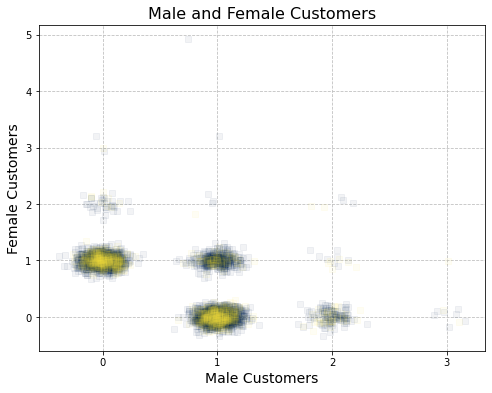

In [18]:
df_ymf = df_init[["y", "MaleN", "FemaleN"]].copy()
df_ymf["MaleN"] = jitter_data2(df_ymf["MaleN"], random_gen) 
df_ymf["FemaleN"] = jitter_data2(df_ymf["FemaleN"], random_gen) 

fig_ymf, ax_ymf = plt.subplots()
ax_ymf.scatter(df_ymf.loc[df_ymf["y"] == 1, "FemaleN"], df_ymf.loc[df_ymf["y"] == 1, "MaleN"], 
               alpha=0.05, 
               color = colors_cividis5[0], 
               marker = ",", 
               label = "Yes (y=1)", zorder = 100)

ax_ymf.scatter(df_ymf.loc[df_ymf["y"] == 0, "FemaleN"], df_ymf.loc[df_ymf["y"] == 0, "MaleN"], 
               alpha=0.05, 
               color = colors_cividis5[4], 
               marker = ",", 
               label = "No (y=0)", zorder = 100)



ax_ymf.set_xlabel("Male Customers", fontsize = 14)
ax_ymf.set_ylabel("Female Customers", fontsize = 14)
ax_ymf.set_title("Male and Female Customers", fontsize = 16)
ax_ymf.grid()

ax_ymf.set_yticks(np.arange(0, 6, 1))
ax_ymf.set_yticklabels(np.arange(0, 6, 1))

ax_ymf.set_xticks(np.arange(0, 4, 1))
ax_ymf.set_xticklabels(np.arange(0, 4, 1))

ax_ymf.grid(linestyle = "dashed", zorder = 200, color = "#bfbfbf")


fig_ymf.set_size_inches([8, 6])

if save_figures:
    fig_name = f"{figure_path}Male and Female Customers"
    fig_ymf.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_inches="tight")
    fig_ymf.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_inches="tight")
    fig_ymf.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_inches="tight")

In [19]:
df_tar_bar2 = df_init[["y", "Year", "Supermarket", "Weather"]].copy()
df_tar_bar2.replace({"y": {0:"No", 1:"Yes"}}, inplace = True)

df_tar_bar2 = df_tar_bar2[["y", "Year", "Supermarket", "Weather"]].groupby(["Supermarket", "Year", "y"]).agg("count").unstack()
df_tar_bar2.columns = df_tar_bar2.columns.droplevel()
df_tar_bar2.columns.name = None
df_tar_bar2 = df_tar_bar2.reset_index()

df_tar_bar2

,Supermarket,Year,No,Yes
0,Asda,2015,77,341
1,Asda,2016,38,492
2,Tesco Extra,2015,132,277
3,Tesco Extra,2016,101,495
4,Tesco Metro,2015,121,274
5,Tesco Metro,2016,95,420
6,Waitrose,2015,125,290
7,Waitrose,2016,60,426


In [20]:
df_tar_bar2["Sum"] = df_tar_bar2["Yes"] + df_tar_bar2["No"]
df_tar_bar2["Yes"] = df_tar_bar2["Yes"]/df_tar_bar2["Sum"]
df_tar_bar2["No"] = df_tar_bar2["No"]/df_tar_bar2["Sum"]
df_tar_bar2

,Supermarket,Year,No,Yes,Sum
0,Asda,2015,0.184211,0.815789,418
1,Asda,2016,0.071698,0.928302,530
2,Tesco Extra,2015,0.322738,0.677262,409
3,Tesco Extra,2016,0.169463,0.830537,596
4,Tesco Metro,2015,0.306329,0.693671,395
5,Tesco Metro,2016,0.184466,0.815534,515
6,Waitrose,2015,0.301205,0.698795,415
7,Waitrose,2016,0.123457,0.876543,486


In [21]:
df_tar_bar2 = df_tar_bar2.sort_values(by = "Year", ignore_index = True)
df_tar_bar2

,Supermarket,Year,No,Yes,Sum
0,Asda,2015,0.184211,0.815789,418
1,Tesco Extra,2015,0.322738,0.677262,409
2,Tesco Metro,2015,0.306329,0.693671,395
3,Waitrose,2015,0.301205,0.698795,415
4,Asda,2016,0.071698,0.928302,530
5,Tesco Extra,2016,0.169463,0.830537,596
6,Tesco Metro,2016,0.184466,0.815534,515
7,Waitrose,2016,0.123457,0.876543,486


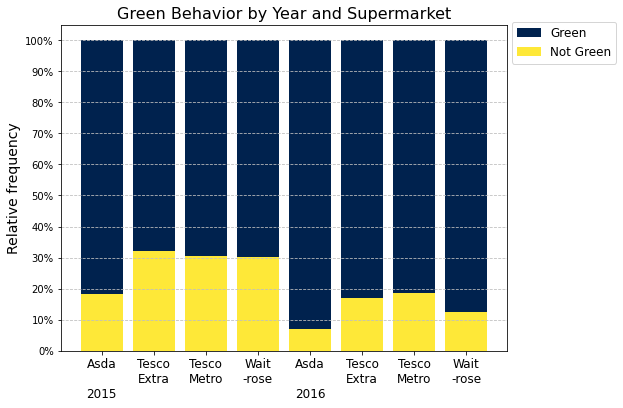

In [22]:
tar_bar2_ticks = [f"{y}, {s}" for y, s in zip(df_tar_bar2["Year"], df_tar_bar2["Supermarket"])]
tar_bar2_xlabels = ["Asda\n\n2015", "Tesco\nExtra", "Tesco\nMetro", "Wait\n-rose",
                    "Asda\n\n2016", "Tesco\nExtra", "Tesco\nMetro", "Wait\n-rose"]



fig_tar_bar2, ax_tar_bar2 = plt.subplots()

ax_tar_bar2.bar(x = tar_bar2_ticks, 
                height = df_tar_bar2["Yes"], 
                bottom = df_tar_bar2["No"],
                width = 0.8, 
                zorder = -100, 
                label = "Green", 
                color = colors_cividis5[0])

ax_tar_bar2.bar(x = tar_bar2_ticks, 
                height = df_tar_bar2["No"], 
                width = 0.8, 
                zorder = -100, 
                label = "Not Green", 
                color = colors_cividis5[4])

ax_tar_bar2.set_xlabel("") 
ax_tar_bar2.set_ylabel("Relative frequency", fontsize = 14)
ax_tar_bar2.set_title("Green Behavior by Year and Supermarket", fontsize = 16)

ax_tar_bar2.set_xticks(tar_bar2_ticks)
ax_tar_bar2.set_xticklabels(tar_bar2_xlabels, fontsize = 12)

ax_tar_bar2.set_yticks(np.arange(0, 1.1, 0.1))
ax_tar_bar2.set_yticklabels([f"{str(i)}%" for i in np.arange(0, 110, 10)])
ax_tar_bar2.grid(axis = "y", linestyle = "dashed", zorder = 200, color = "#bfbfbf")

fig_tar_bar2.set_size_inches([8, 6])
lgd = fig_tar_bar2.legend(loc = 1, bbox_to_anchor = (1.1, 0.9), fontsize= 12)

# save_figures
if save_figures:
    fig_name = f"{figure_path}Green Behavior by Supermarket"
    fig_tar_bar2.savefig(f"{fig_name}.pdf", 
                         dpi = 300, 
                         bbox_extra_artists=(lgd,), 
                         bbox_inches="tight")
    fig_tar_bar2.savefig(f"{fig_name}.png", 
                         dpi = 300, 
                         bbox_extra_artists=(lgd,), 
                         bbox_inches="tight")
    fig_tar_bar2.savefig(f"{fig_name}.svg", 
                         dpi = 300, 
                         bbox_extra_artists=(lgd,), 
                         bbox_inches="tight")

In [23]:
df_tar_bar3 = df_init[["y", "Year", "Gender", "Weather"]].copy()
df_tar_bar3.replace({"y": {0:"No", 1:"Yes"}}, inplace = True)

df_tar_bar3 = df_tar_bar3[["y", "Year", "Gender", "Weather"]].groupby(["Gender", "Year", "y"]).agg("count").unstack()
df_tar_bar3.columns = df_tar_bar3.columns.droplevel()
df_tar_bar3.columns.name = None
df_tar_bar3 = df_tar_bar3.reset_index()

df_tar_bar3

,Gender,Year,No,Yes
0,Female,2015,202,509
1,Female,2016,108,816
2,Group: Gender not applicable,2015,77,253
3,Group: Gender not applicable,2016,48,352
4,Male,2015,176,420
5,Male,2016,138,665


In [24]:
df_tar_bar3["Sum"] = df_tar_bar3["Yes"] + df_tar_bar3["No"]
df_tar_bar3["Yes"] = df_tar_bar3["Yes"]/df_tar_bar3["Sum"]
df_tar_bar3["No"] = df_tar_bar3["No"]/df_tar_bar3["Sum"]
df_tar_bar3

,Gender,Year,No,Yes,Sum
0,Female,2015,0.284107,0.715893,711
1,Female,2016,0.116883,0.883117,924
2,Group: Gender not applicable,2015,0.233333,0.766667,330
3,Group: Gender not applicable,2016,0.120000,0.880000,400
4,Male,2015,0.295302,0.704698,596
5,Male,2016,0.171856,0.828144,803


In [25]:
df_tar_bar3 = df_tar_bar3.sort_values(by = "Year", ignore_index = True)
df_tar_bar3 = df_tar_bar3.iloc[[0,2,1,3,5,4],:]
df_tar_bar3

,Gender,Year,No,Yes,Sum
0,Female,2015,0.284107,0.715893,711
2,Male,2015,0.295302,0.704698,596
1,Group: Gender not applicable,2015,0.233333,0.766667,330
3,Female,2016,0.116883,0.883117,924
5,Male,2016,0.171856,0.828144,803
4,Group: Gender not applicable,2016,0.120000,0.880000,400


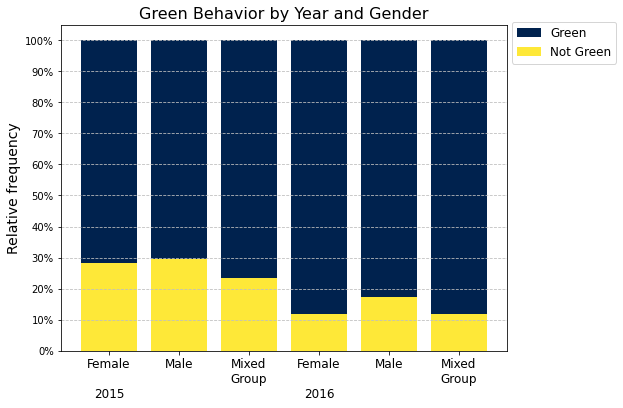

In [26]:
tar_bar3_ticks =[f"{c}, {g}" for c, g in zip(df_tar_bar3["Year"], df_tar_bar3["Gender"])]
tar_bar3_xlabels = ["Female\n\n2015", "Male", "Mixed\nGroup",
                    "Female\n\n2016", "Male", "Mixed\nGroup"]



fig_tar_bar3, ax_tar_bar3 = plt.subplots()

ax_tar_bar3.bar(x = tar_bar3_ticks, 
                height = df_tar_bar3["Yes"], 
                bottom = df_tar_bar3["No"],
                width = 0.8, 
                zorder = -100, 
                label = "Green", 
                color = colors_cividis5[0])

ax_tar_bar3.bar(x = tar_bar3_ticks, 
                height = df_tar_bar3["No"], 
                width = 0.8, 
                zorder = -100, 
                label = "Not Green", 
                color = colors_cividis5[4])

ax_tar_bar3.set_xlabel("") 
ax_tar_bar3.set_ylabel("Relative frequency", fontsize = 14)
ax_tar_bar3.set_title("Green Behavior by Year and Gender", fontsize = 16)

ax_tar_bar3.set_xticks(tar_bar3_ticks)
ax_tar_bar3.set_xticklabels(tar_bar3_xlabels, fontsize = 12)

ax_tar_bar3.set_yticks(np.arange(0, 1.1, 0.1))
ax_tar_bar3.set_yticklabels([f"{str(i)}%" for i in np.arange(0, 110, 10)])
ax_tar_bar3.grid(axis = "y", linestyle = "dashed", zorder = 200, color = "#bfbfbf")

fig_tar_bar3.set_size_inches([8, 6])
lgd = fig_tar_bar3.legend(loc = 1, bbox_to_anchor = (1.1, 0.9), fontsize= 12)

# save_figures
if save_figures:
    fig_name = f"{figure_path}Green Behavior by Gender"
    fig_tar_bar3.savefig(f"{fig_name}.pdf", 
                         dpi = 300, 
                         bbox_extra_artists=(lgd,), 
                         bbox_inches="tight")
    fig_tar_bar3.savefig(f"{fig_name}.png", 
                         dpi = 300, 
                         bbox_extra_artists=(lgd,), 
                         bbox_inches="tight")
    fig_tar_bar3.savefig(f"{fig_name}.svg", 
                         dpi = 300, 
                         bbox_extra_artists=(lgd,), 
                         bbox_inches="tight")